Code that downloads the information about charm uploads.

In [4]:
import json
import sys
import requests
from datetime import datetime
from datetime import timedelta

CHARMSTORE_URL = 'https://api.jujucharms.com/charmstore/v5'
CHANGES_URL = '/changes/published?'

def download_stats(start_date_str, end_date_str, interval, arg_output):
    start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
    end_date = datetime.strptime(end_date_str, '%Y-%m-%d')

    data = []

    while start_date <= end_date:
        eow = start_date + timedelta(days=interval-1)
        param1 = start_date.strftime('%Y-%m-%d')
        param2 = eow.strftime('%Y-%m-%d')
        print(param1, param2)

        cs_data = {}
        cs_data["start"] = param1
        cs_data["stop"] = param2

        url = CHARMSTORE_URL+CHANGES_URL+"start="+param1+"&stop="+param2
        #print url
        r = requests.get(url)	
        uploads = {}
        uploads["date"]=param1
        uploads["charms"]=r.json()
        data.append(uploads)

        start_date = eow + timedelta(days=1)

    f = open(arg_output, "w")
    f.write(json.dumps(data))


Let's get data for two days, October 18th and 19th 2018. Write it out to test-changes.json.

In [60]:
download_stats("2018-10-18", "2018-10-19", 1, "test-changes.json")

2018-10-18 2018-10-18
2018-10-19 2018-10-19


In [62]:
with open('test-changes.json') as f:
    data = json.load(f)

In [63]:
print(data)

[{'date': '2018-10-18', 'charms': [{'Id': 'cs:~containers/calico-175', 'PublishTime': '2018-10-18T23:45:00.715Z'}, {'Id': 'cs:~containers/kubernetes-master-233', 'PublishTime': '2018-10-18T23:40:23.424Z'}, {'Id': 'cs:~containers/canal-164', 'PublishTime': '2018-10-18T23:30:39.19Z'}, {'Id': 'cs:~containers/kubernetes-worker-252', 'PublishTime': '2018-10-18T23:27:06.002Z'}, {'Id': 'cs:~containers/easyrsa-126', 'PublishTime': '2018-10-18T23:23:50.572Z'}, {'Id': 'cs:~containers/flannel-154', 'PublishTime': '2018-10-18T23:18:57.439Z'}, {'Id': 'cs:~containers/kubernetes-e2e-182', 'PublishTime': '2018-10-18T23:13:01.963Z'}, {'Id': 'cs:~containers/kubeapi-load-balancer-175', 'PublishTime': '2018-10-18T23:11:11.911Z'}, {'Id': 'cs:~containers/calico-174', 'PublishTime': '2018-10-18T22:45:04.569Z'}, {'Id': 'cs:~containers/kubernetes-master-232', 'PublishTime': '2018-10-18T22:40:37.579Z'}, {'Id': 'cs:~containers/easyrsa-125', 'PublishTime': '2018-10-18T22:34:58.38Z'}, {'Id': 'cs:~containers/canal-

In [135]:
download_stats("2018-01-01", "2018-10-19", 1, "uploads.json")

2018-01-01 2018-01-01
2018-01-02 2018-01-02
2018-01-03 2018-01-03
2018-01-04 2018-01-04
2018-01-05 2018-01-05
2018-01-06 2018-01-06
2018-01-07 2018-01-07
2018-01-08 2018-01-08
2018-01-09 2018-01-09
2018-01-10 2018-01-10
2018-01-11 2018-01-11
2018-01-12 2018-01-12
2018-01-13 2018-01-13
2018-01-14 2018-01-14
2018-01-15 2018-01-15
2018-01-16 2018-01-16
2018-01-17 2018-01-17
2018-01-18 2018-01-18
2018-01-19 2018-01-19
2018-01-20 2018-01-20
2018-01-21 2018-01-21
2018-01-22 2018-01-22
2018-01-23 2018-01-23
2018-01-24 2018-01-24
2018-01-25 2018-01-25
2018-01-26 2018-01-26
2018-01-27 2018-01-27
2018-01-28 2018-01-28
2018-01-29 2018-01-29
2018-01-30 2018-01-30
2018-01-31 2018-01-31
2018-02-01 2018-02-01
2018-02-02 2018-02-02
2018-02-03 2018-02-03
2018-02-04 2018-02-04
2018-02-05 2018-02-05
2018-02-06 2018-02-06
2018-02-07 2018-02-07
2018-02-08 2018-02-08
2018-02-09 2018-02-09
2018-02-10 2018-02-10
2018-02-11 2018-02-11
2018-02-12 2018-02-12
2018-02-13 2018-02-13
2018-02-14 2018-02-14
2018-02-15

In [136]:
with open('uploads.json') as f:
    data = json.load(f)

Now we have JSON data for uploads. For each item, map the date to the number of uploads for that date, getting two arrays: array of dates, and array of number of uploads.

In [137]:
dates = []
uploads = []
num_uploads = []
for d in data:
    dates.append(d['date'])
    uploads.append(d['charms'])
    num_uploads.append(len(d['charms']))
    
#print(dates)
print(num_uploads)

[0, 2, 5, 10, 20, 8, 3, 13, 3, 20, 4, 29, 0, 0, 2, 21, 4, 7, 41, 16, 14, 18, 21, 44, 31, 12, 9, 1, 5, 25, 20, 15, 26, 5, 4, 7, 11, 41, 37, 22, 1, 13, 22, 21, 21, 15, 17, 4, 4, 12, 18, 26, 50, 17, 17, 8, 13, 24, 23, 15, 7, 6, 0, 26, 31, 28, 87, 43, 18, 0, 17, 5, 15, 20, 18, 0, 1, 15, 19, 22, 21, 35, 0, 21, 8, 4, 10, 14, 29, 9, 2, 2, 49, 32, 6, 22, 6, 0, 17, 18, 21, 38, 20, 6, 2, 40, 31, 19, 11, 26, 4, 6, 34, 27, 55, 38, 32, 14, 10, 24, 43, 24, 19, 32, 15, 7, 9, 36, 55, 21, 42, 9, 1, 68, 38, 43, 12, 15, 4, 4, 6, 15, 7, 6, 1, 0, 2, 16, 9, 14, 6, 17, 0, 0, 13, 25, 20, 23, 14, 0, 0, 7, 49, 16, 13, 49, 1, 0, 25, 8, 12, 9, 5, 1, 0, 28, 21, 25, 34, 25, 12, 0, 26, 32, 17, 22, 23, 15, 0, 10, 40, 79, 32, 22, 0, 1, 62, 30, 21, 57, 22, 7, 6, 11, 16, 13, 13, 11, 2, 6, 28, 16, 24, 13, 24, 5, 4, 41, 20, 15, 26, 32, 17, 14, 27, 36, 39, 27, 23, 5, 6, 42, 30, 14, 11, 3, 3, 1, 20, 54, 116, 151, 35, 14, 17, 22, 48, 47, 88, 35, 11, 9, 16, 83, 16, 10, 21, 12, 22, 15, 21, 24, 66, 25, 1, 18, 35, 33, 30, 28, 62

Let's export the data, so that we can load it later with pandas.

In [138]:
import pandas as pd
import numpy as np

a = np.array(dates)
b = np.array(num_uploads)
df = pd.DataFrame({"date" : a, "num_uploads" : b})
df.to_csv("num-uploads.csv", index=False)

Let's load the data and print out some info about it.

In [139]:
uploads_data = pd.read_csv("num-uploads.csv")
uploads_data.head()

date  num_uploads
0  2018-01-01            0
1  2018-01-02            2
2  2018-01-03            5
3  2018-01-04           10
4  2018-01-05           20

In [140]:
uploads_data.info

<bound method DataFrame.info of            date  num_uploads
0    2018-01-01            0
1    2018-01-02            2
2    2018-01-03            5
3    2018-01-04           10
4    2018-01-05           20
5    2018-01-06            8
6    2018-01-07            3
7    2018-01-08           13
8    2018-01-09            3
9    2018-01-10           20
10   2018-01-11            4
11   2018-01-12           29
12   2018-01-13            0
13   2018-01-14            0
14   2018-01-15            2
15   2018-01-16           21
16   2018-01-17            4
17   2018-01-18            7
18   2018-01-19           41
19   2018-01-20           16
20   2018-01-21           14
21   2018-01-22           18
22   2018-01-23           21
23   2018-01-24           44
24   2018-01-25           31
25   2018-01-26           12
26   2018-01-27            9
27   2018-01-28            1
28   2018-01-29            5
29   2018-01-30           25
..          ...          ...
262  2018-09-20           66
263  2018-0

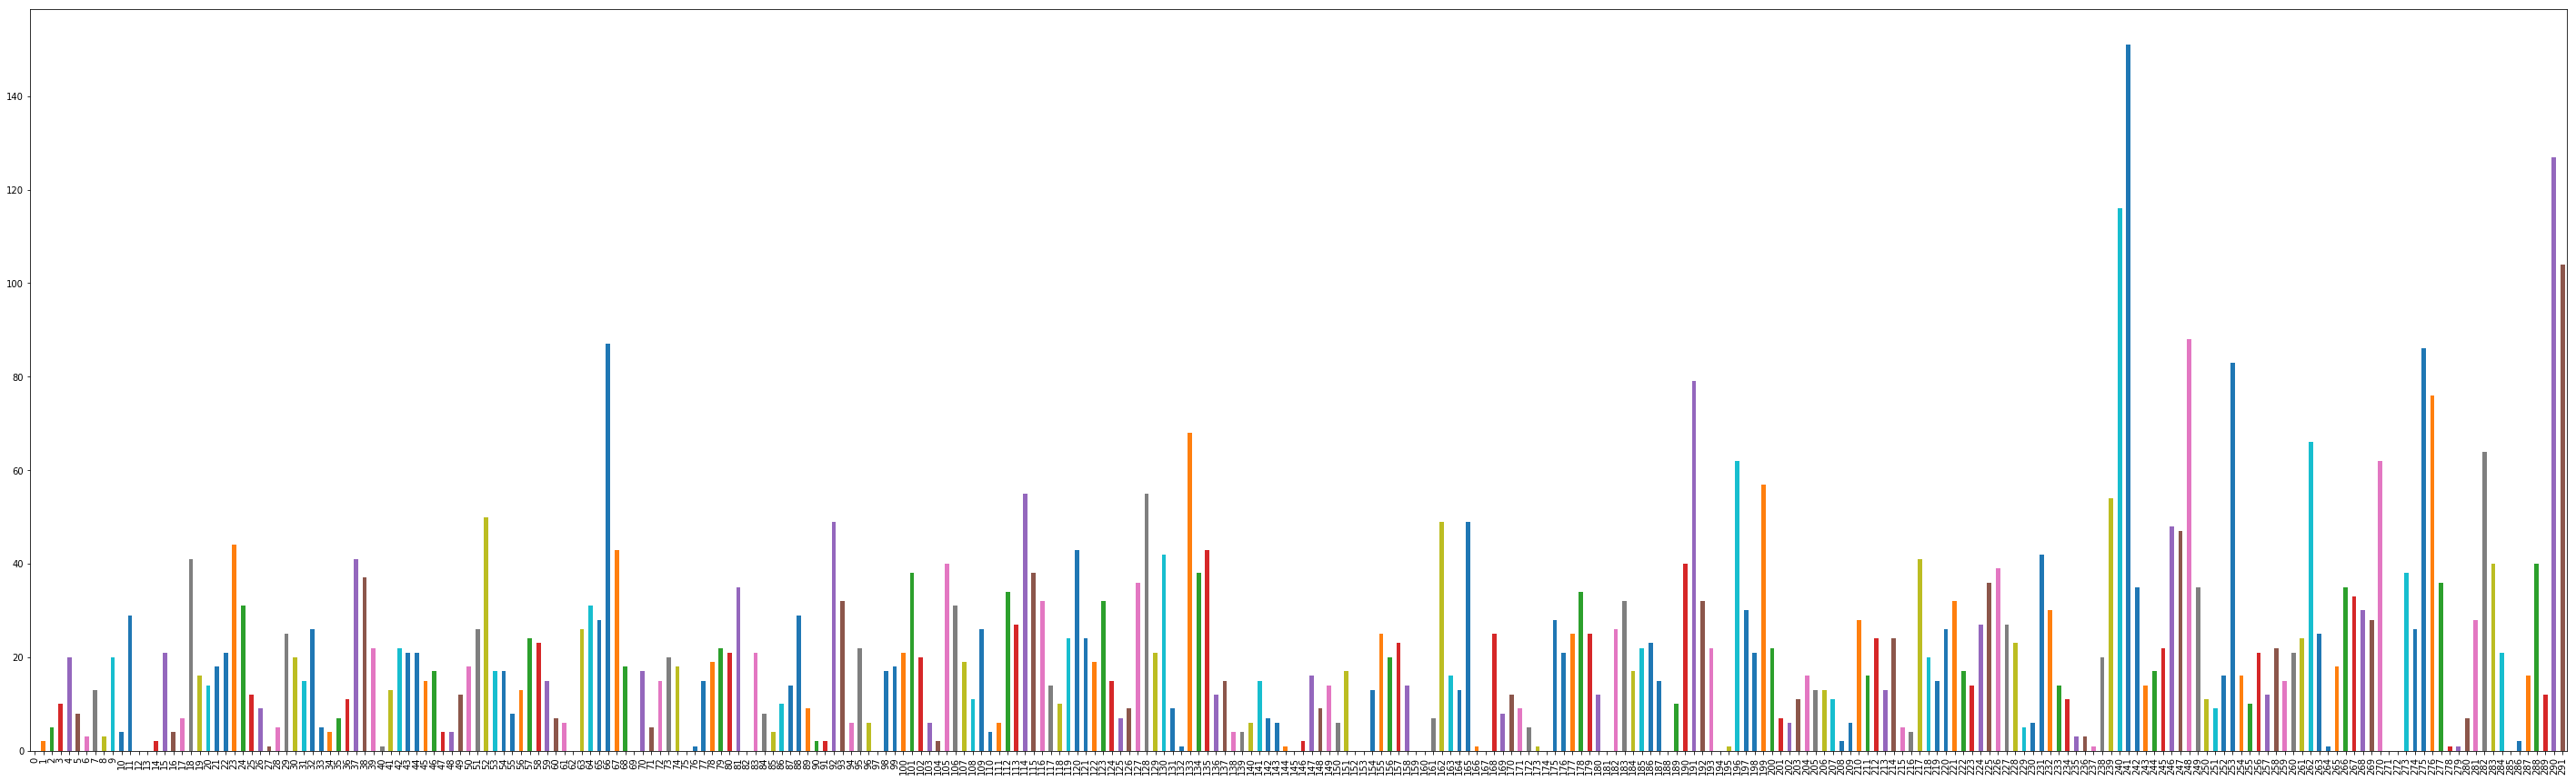

In [183]:
uploads_data['num_uploads'].plot(kind="bar", figsize=(50,15))

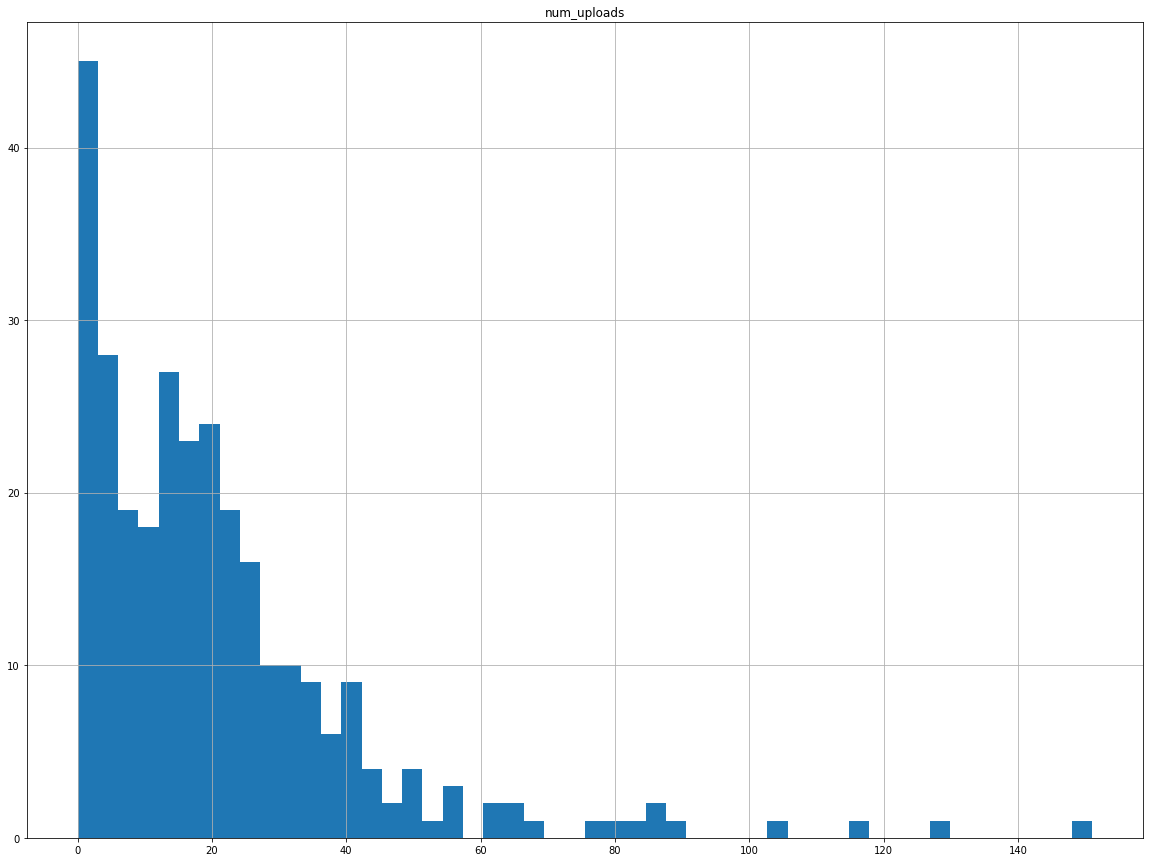

In [191]:
import matplotlib.pyplot as plt
uploads_data.hist(bins=50, figsize=(20,15))
plt.show()

In [143]:
uploads_data['num_uploads'].agg([pd.np.min, pd.np.max, pd.np.mean, pd.np.sum])

amin       0.000000
amax     151.000000
mean      21.099315
sum     6161.000000
Name: num_uploads, dtype: float64

In [144]:
def split_name(charm):
    #print(charm)
    n = charm.replace('cs:~','').split('/')
    nn = n[-1].split('-')
    del(nn[-1])
    charm_name = "-".join(nn)
    #print(n[0], charm_name)
    return n[0], charm_name

charmers = []
charms = []

#print(uploads)
for day in uploads:
    for upload in day:
        charm = upload['Id']
        charmer, charm_name = split_name(charm)
        charmers.append(charmer)
        charms.append(charm_name)
        
c = np.array(charmers)
d = np.array(charms)
df2 = pd.DataFrame({"charmer" : c, "application" : d})
df2.to_csv("charm-uploads.csv", index=False)

In [145]:
print(df2["charmer"].unique())

['ce-hyperscale' 'openstack-charmers-next' 'jamesbeedy' 'mskalka'
 'openstack-charmers' 'containers' 'omnivector' 'james-page' 'rharding'
 'csd-garr' 'gnuoy' 'ryeterrell' 'juju-gui' 'filebeat-charmers' 'dmitriis'
 'boucherv29' 'admcleod' 'canonical-bootstack' 'cynerva' 'nuvolasns'
 'thedac' 'postgresql-charmers' 'elasticsearch-charmers' 'cmars'
 'prometheus-charmers' 'telegraf-charmers' 'cplane-team' 'nrpe-charmers'
 'graylog-charmers' 'nagios-charmers' 'influxdb-charmers' 'knobby'
 'discourse-charmers' 'cassandra-charmers' 'marcoceppi'
 'livepatch-charmers' 'kwmonroe' 'openstack-dev-s' 'kos.tsakalozos'
 'apache2-charmers' 'chris.sanders' 'haproxy-team' 'vtas-hyperscale-ci'
 'ntp-team' 'paulgear' 'spiculecharms' 'landscape' 'vault-charmers'
 'mthaddon' '1chb1n' 'canonical-solutions' 'tengu-team' 'bigdata-charmers'
 'landscape-charmers' 'mongodb-charmers' 'mariosplivalo'
 'chris.macnaughton' 'rogpeppe' 'jameinel' 'petevg' 'slurm-charmers'
 'autocert-charmers' 'memcached-team' 'sdn-charm

Number of charmers uploading the charms in the time period.

In [190]:
len(df2["charmer"].unique())

108

In [165]:
df2.groupby(["charmer"]).count()

application
charmer                                 
1chb1n                                 5
6wind                                 11
admcleod                               4
adriancampos                           2
ae40515                                1
afreiberger                            1
alai                                   3
apache-openid-charmers                 2
apache2-charmers                       4
asbalderson                            1
autocert-charmers                     16
axino                                 37
bigdata-charmers                     268
boucherv29                             8
canonical-bootstack                   30
canonical-solutions                    4
canonical-sysadmins                    1
carpalex                               4
cassandra-charmers                    19
cassiocassio                           3
ce-hyperscale                          1
charmers                               1
chris.macnaughton                     14
chris.sanders                         39
cmars                                  4
containers                          2100
cplane-team                           51
csd-garr                              28
cynerva                               76
deej                                  23
...                                  ...
openstack-dev-s                       25
paulgear                              41
peter-sabaini                          2
petevg                                 2
pguimaraes                            40
pjdc                                   8
postgresql-charmers                   26
prometheus-charmers                   58
redis-charmers                         2
rharding                              21
rogpeppe                               2
ryeterrell                            34
sdn-charmers                           6
sentry-charmers                        7
sgiller                                2
slurm-charmers                         1
spiculecharms                        232
squid-reverseproxy-charmers            2
szeestraten                            2
tcuthbert                             11
telegraf-charmers                     14
tengu-team                            33
thedac                                25
vault-charmers                         1
vtas-hyperscale-ci                     2
wiilink                                4
xavpaice                              29
yellow                                 1
ykato-aims                             2
yoshikadokawa                          2

[108 rows x 1 columns]

In [178]:
charmer_count = df2.groupby(["charmer"]).count()
charmer_count.to_csv("charmer-count.cvs")

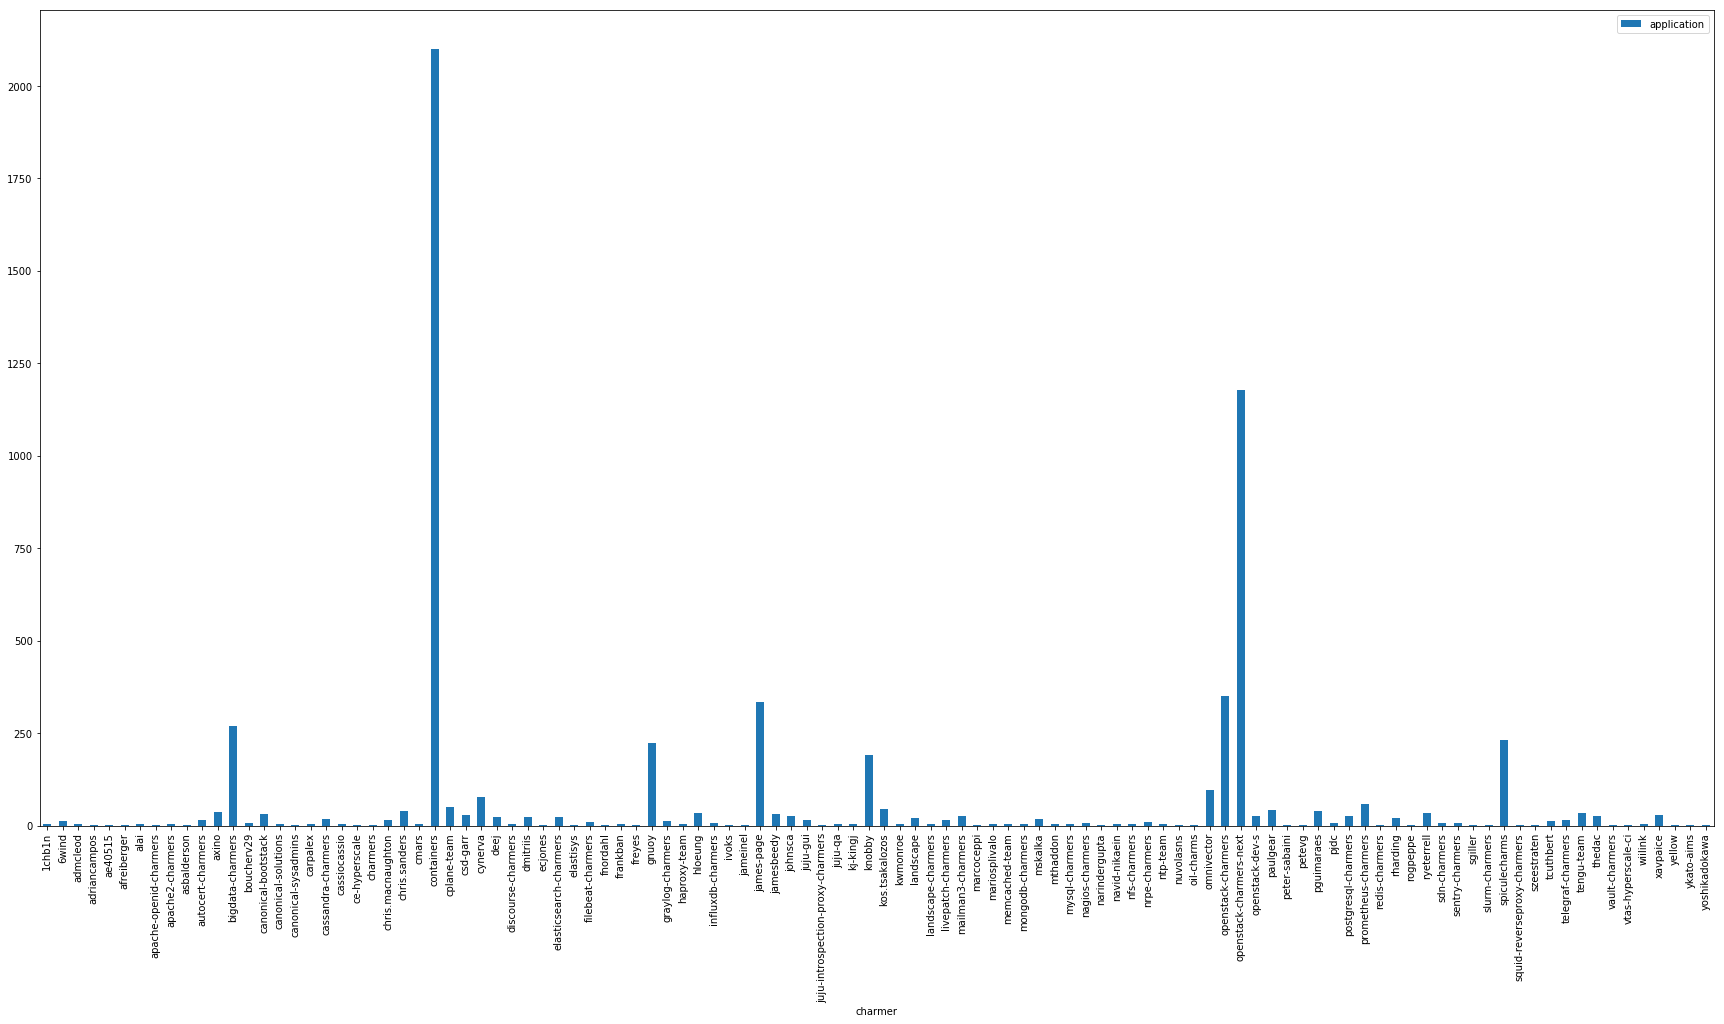

In [185]:
df2.groupby(["charmer"]).count().plot(kind="bar", figsize=(30,15))

In [148]:
print(df2["application"].unique())

['scalebot-jenkins' 'rabbitmq-server' 'heat' 'ceilometer' 'keystone'
 'elasticsearch' 'kibana' 'cinder-three-par' 'nova-compute'
 'nova-cloud-controller' 'hacluster' 'percona-cluster' 'keystone-ldap'
 'kubernetes-core' 'thelounge' 'ceph-osd' 'openstack-kpi-scripts'
 'jujushell' 'neutron-api' 'designate' 'openstack-dashboard'
 'canonical-kubernetes-canal' 'kubernetes-calico'
 'canonical-kubernetes-elastic' 'canonical-kubernetes' 'kubernetes-worker'
 'kubeapi-load-balancer' 'filebeat' 'openldap' 'keepalived' 'magpie'
 'ceph-mon' 'etcd' 'canal' 'kubernetes-e2e' 'kubernetes-master' 'calico'
 'cinder' 'neutron-openvswitch' 'glance' 'neutron-gateway'
 'openstack-service-checks' 'flannel' 'easyrsa' 'policy-routing'
 'rpfilter' 'barbican' 'cinder-ceph' 'cinder-backup' 'ceilometer-agent'
 'odl-controller' 'ceph-radosgw' 'swift-storage' 'swift-proxy'
 'nova-compute-proxy' 'lxd' 'ceph-proxy' 'postgresql' 'tempest'
 'barbican-softhsm' 'ceph-fs' 'manila' 'manila-generic' 'neutron-api-odl'
 'gnocchi

Number of applications loaded in the time period.

In [189]:
len(df2["application"].unique())

342

In [180]:
df2.groupby(["application"]).count()

charmer
application                          
anssr-analytics                     1
anssr-data-engine                   2
anssr-hadoop                        3
aodh                               46
aodh-sf00182054                     1
apache-drill                      117
apache-openid                       2
apache-solr                         1
apache2                             4
arangodb                            1
autocert                           16
automate-spark-jobs                 2
aws                                 8
aws-elb                             4
aws-integrator                      6
azure-integrator                    2
barbican                           26
barbican-softhsm                   17
basic-auth-service                 12
bcache-tuning                      10
calico                            175
canal                             154
canonical-kubernetes              153
canonical-kubernetes-canal        148
canonical-kubernetes-elastic      129
canonical-kubernetes-nvidia        10
canonical-livepatch                14
cassandra                          16
ceilometer                         51
ceilometer-agent                   28
...                               ...
test                                4
test-perm                           1
test-vault-kv                       1
thelounge                           1
thingworx-foundation-server         1
topbeat                             3
tor-bridge                          1
tor-hidden                          1
tor-relay                           1
trilio-data-mover                   3
trilio-data-mover-api               3
trilio-horizon-plugin               3
twister                             1
ubuntu                              3
ubuntu-devenv                       1
ubuntu-lite                         1
ubuntu-series-upgrade               1
unattended                          1
uosci-dashboard                     3
vanilla                             1
vault                             131
vault-auto-unlock                   1
virtual-accelerator-compute         6
virtual-accelerator-network         5
vnflcv                              1
vsphere-integrator                  2
weebl                               1
wireguard                           2
zeppelin                           16
zookeeper                          17

[342 rows x 1 columns]

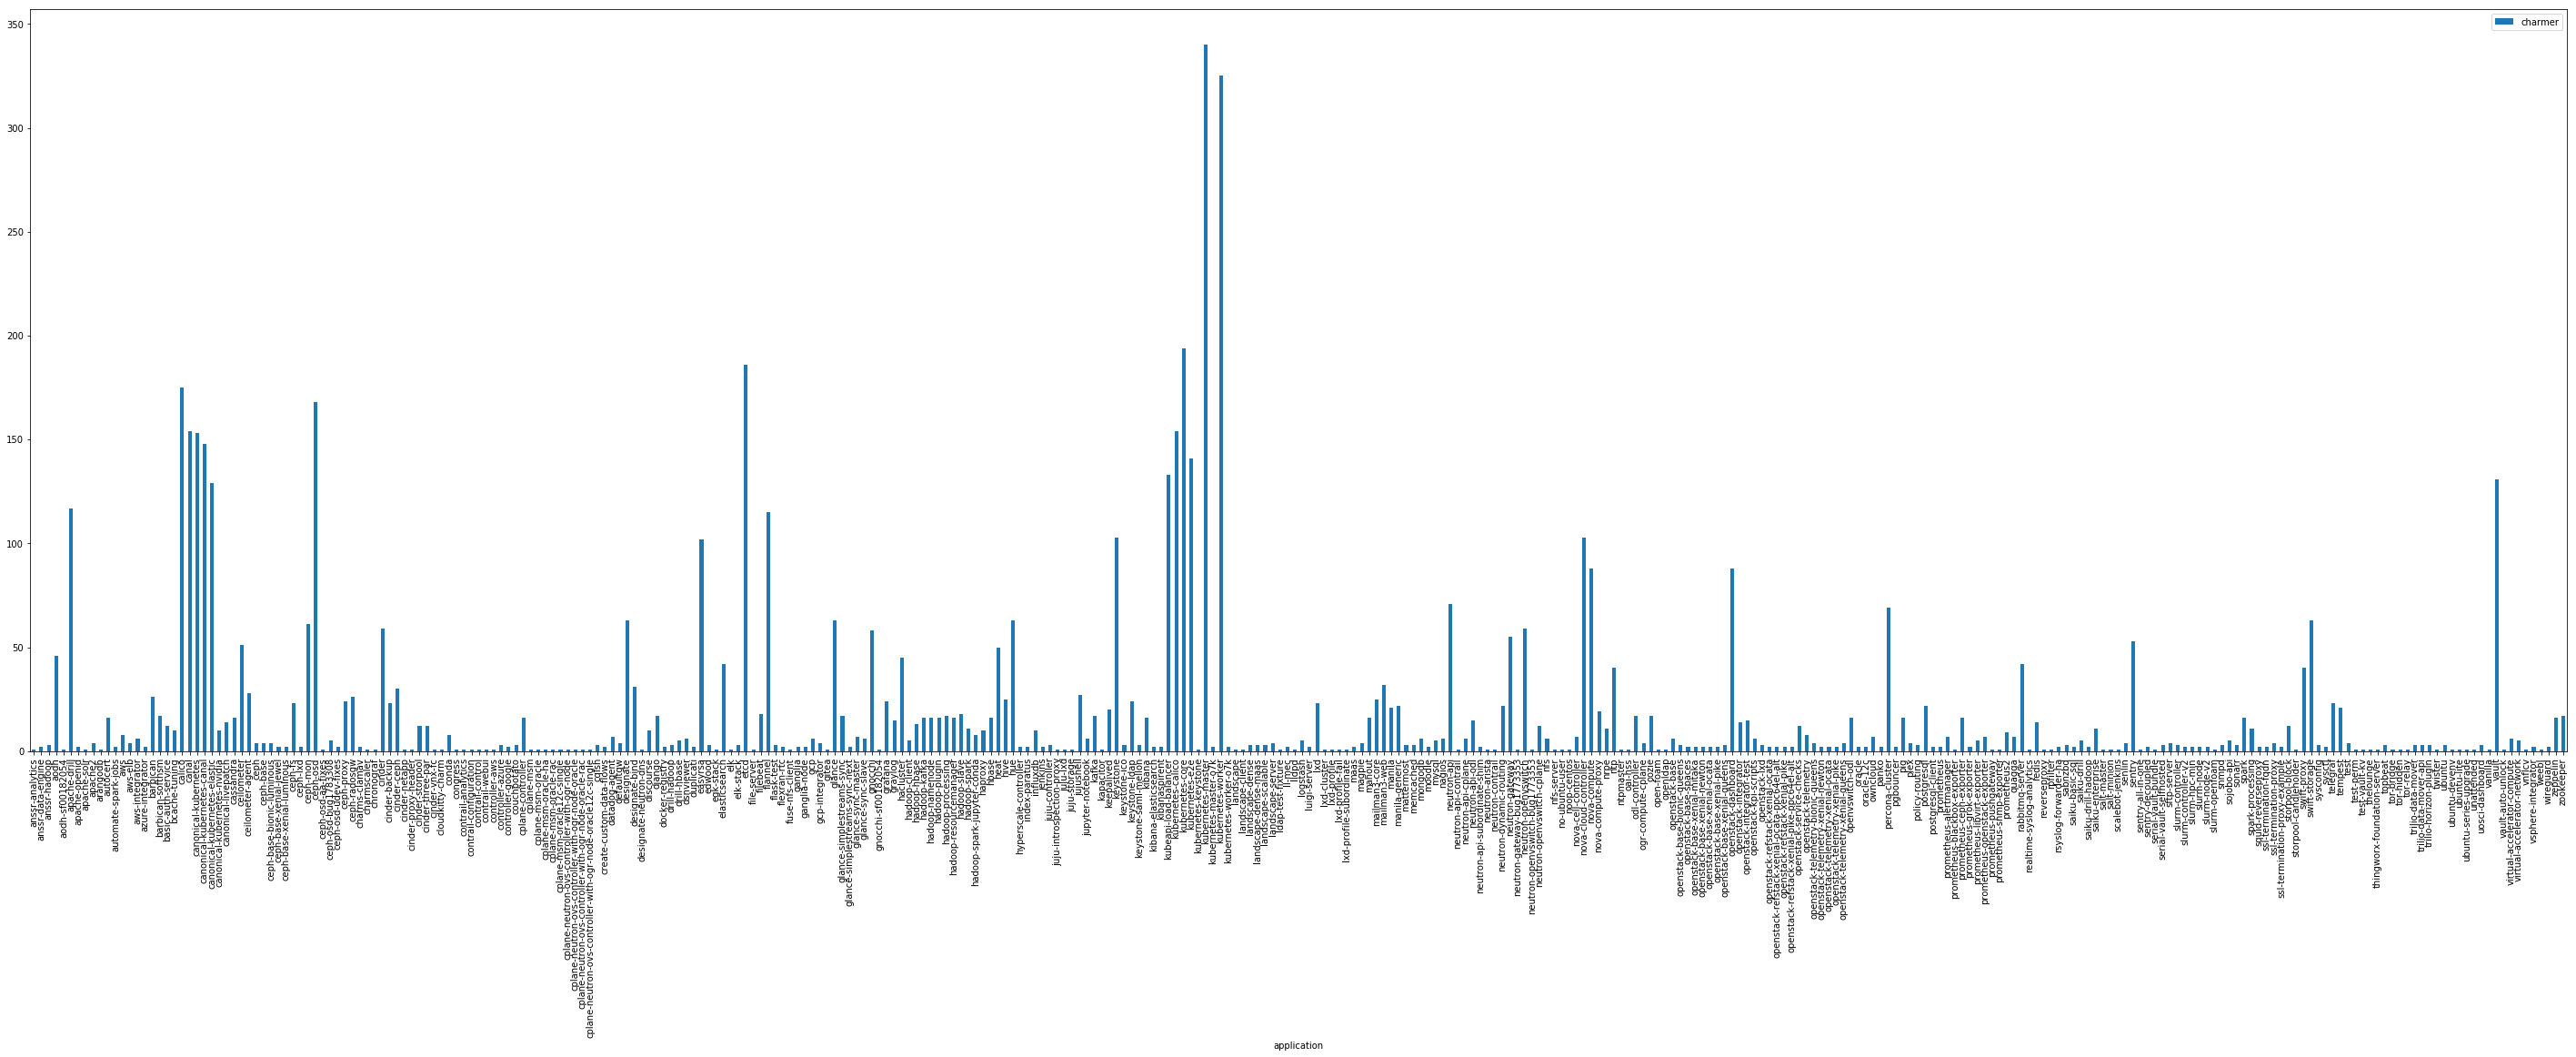

In [182]:
df2.groupby(["application"]).count().plot(kind="bar", figsize=(50,15))

In [164]:
app_count = df2.groupby(["application"]).count()
app_count.to_csv("app-count.csv")

In [162]:
df2.groupby(["charmer", "application"]).count()

Empty DataFrame
Columns: []
Index: [(1chb1n, designate-bind), (1chb1n, glance-simplestreams-sync), (1chb1n, nova-compute), (1chb1n, senlin), (6wind, virtual-accelerator-compute), (6wind, virtual-accelerator-network), (admcleod, magpie), (adriancampos, cinder-vnx-fc), (adriancampos, cloudkitty-charm), (ae40515, neutron-api-odl), (afreiberger, openstack-dashboard), (alai, kibana), (alai, landscape), (alai, landscape-server), (apache-openid-charmers, apache-openid), (apache2-charmers, apache2), (asbalderson, noop-centos), (autocert-charmers, autocert), (axino, redis), (axino, sentry), (axino, telegraf), (bigdata-charmers, hadoop-client), (bigdata-charmers, hadoop-hbase), (bigdata-charmers, hadoop-kafka), (bigdata-charmers, hadoop-namenode), (bigdata-charmers, hadoop-plugin), (bigdata-charmers, hadoop-processing), (bigdata-charmers, hadoop-resourcemanager), (bigdata-charmers, hadoop-slave), (bigdata-charmers, hadoop-spark), (bigdata-charmers, hbase), (bigdata-charmers, hive), (bigdata-charmers, kafka), (bigdata-charmers, mahout), (bigdata-charmers, pig), (bigdata-charmers, realtime-syslog-analytics), (bigdata-charmers, spark), (bigdata-charmers, spark-processing), (bigdata-charmers, zeppelin), (bigdata-charmers, zookeeper), (boucherv29, keepalived), (canonical-bootstack, filebeat), (canonical-bootstack, glance-sync-master), (canonical-bootstack, glance-sync-slave), (canonical-bootstack, juju-controller), (canonical-bootstack, juju-lxd), (canonical-bootstack, landscape-server), (canonical-bootstack, nrpe), (canonical-bootstack, openstack-service-checks), (canonical-bootstack, policy-routing), (canonical-bootstack, sysconfig), (canonical-solutions, serial-vault-bundle), (canonical-solutions, serial-vault-selfhosted), (canonical-sysadmins, ubuntu), (carpalex, kibanaspirent), (carpalex, twister), (carpalex, vnflcv), (cassandra-charmers, cassandra), (cassandra-charmers, cqlsh), (cassiocassio, mattermost), (cassiocassio, mongodb), (ce-hyperscale, scalebot-jenkins), (charmers, mysql), (chris.macnaughton, ceph-osd), (chris.macnaughton, fuse-nfs-client), (chris.macnaughton, ganglia), (chris.macnaughton, ganglia-node), (chris.macnaughton, gitea), (chris.macnaughton, haproxy), (chris.macnaughton, sysctl), (chris.macnaughton, uosci-dashboard), (chris.sanders, ceph), (chris.sanders, ceph-fs), (chris.sanders, ceph-mon), (chris.sanders, ceph-osd), (chris.sanders, couchpotato), (chris.sanders, duplicati), (chris.sanders, file-server), (chris.sanders, grafana), (chris.sanders, haproxy), (chris.sanders, openstack-dashboard), (chris.sanders, plex), (chris.sanders, prometheus-ceph-exporter), (chris.sanders, reverseproxy), (chris.sanders, sabnzbd), (chris.sanders, salt-master), (chris.sanders, salt-minion), (chris.sanders, sftp-server), (chris.sanders, sonarr), (chris.sanders, thingworx-foundation-server), (chris.sanders, wireguard), (cmars, kafka), (cmars, tor-bridge), (cmars, tor-hidden), (cmars, tor-relay), (containers, aws), (containers, aws-integrator), (containers, azure-integrator), (containers, calico), (containers, canal), ...]

[562 rows x 0 columns]

In [169]:
grp = df2.groupby(["charmer", "application"]).count()
grp.to_csv("charmer-app-count.csv")

grp2 = df2.groupby(["application", "charmer"]).count()
grp2.to_csv("app-charmer-count.csv")

In [197]:
grp2.filter(like="kubernetes", axis=0)

Empty DataFrame
Columns: []
Index: [(canonical-kubernetes, containers), (canonical-kubernetes-canal, containers), (canonical-kubernetes-elastic, containers), (canonical-kubernetes-nvidia, containers), (kubernetes-calico, containers), (kubernetes-calico, cynerva), (kubernetes-core, containers), (kubernetes-core, ykato-aims), (kubernetes-e2e, containers), (kubernetes-e2e, kos.tsakalozos), (kubernetes-e2e, ryeterrell), (kubernetes-keystone, csd-garr), (kubernetes-master, containers), (kubernetes-master, cynerva), (kubernetes-master, johnsca), (kubernetes-master, knobby), (kubernetes-master, kos.tsakalozos), (kubernetes-master, pguimaraes), (kubernetes-master, ryeterrell), (kubernetes-master-o7k, dmitriis), (kubernetes-worker, containers), (kubernetes-worker, cynerva), (kubernetes-worker, johnsca), (kubernetes-worker, knobby), (kubernetes-worker, kos.tsakalozos), (kubernetes-worker, pguimaraes), (kubernetes-worker, ryeterrell), (kubernetes-worker-o7k, dmitriis)]

In [196]:
grp.filter(like="spicule", axis=0)

Empty DataFrame
Columns: []
Index: [(spiculecharms, anssr-analytics), (spiculecharms, anssr-data-engine), (spiculecharms, anssr-hadoop), (spiculecharms, apache-drill), (spiculecharms, apache-solr), (spiculecharms, drill-hadoop), (spiculecharms, drill-hbase), (spiculecharms, hue), (spiculecharms, oozie), (spiculecharms, saiku-basic-sql), (spiculecharms, saiku-drill), (spiculecharms, saiku-drill-hadoop), (spiculecharms, saiku-enterprise)]

In [176]:
df2.groupby(["charmer"]).count().filter(like="spicule", axis=0)

application
charmer                   
spiculecharms          232